# Comparing Ca channels with Jedrzejewska-Szmek 2017


Some channels in Jedrzejewska-Szmek et al., (2017) are built using $\alpha$, $\beta$ anotation.
The relationship between $\alpha$, $\beta$ and the definintion of state variables used in our Neuron mechanisms is:

$\tau = \frac{1}{\alpha + \beta}$

$x_{1/2}^\infty = \alpha \cdot \tau$

## Voltage clamp
I started of by comparing my VGCC's with the ones in Jedrzejewska-Szmek et al (2017). "Calcium dynamics predict direction of synaptic plasticity in striatal spiny projection neurons". The result is shown below.

In [1]:
import numpy                as np
import matplotlib.pyplot    as plt
import pandas               as pd
%matplotlib inline

from scipy.stats import linregress

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams['savefig.dpi'] = 1200

pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "%s" % self.to_latex()

pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame


import warnings; warnings.simplefilter('ignore')

vm         = np.arange(-100, 51)
vm2        = np.arange(-0.1,0.051, 0.001)

In [2]:
import glob    

def plot_vclamp(markers, ax=False, what=''):
    
    if not all(ax):
        fig, ax = plt.subplots(1,2, figsize=(6,12))
    
    VM = np.arange(-40, 1, 10)

    for v in VM:
        
        base = 'Results/ComparingCa_JS/results_'+what+'vClamp'+str(v)+'mV_'

        f = base+markers[0]+'.dat'
        x,y = np.loadtxt(f, unpack=True)
        y = np.abs(y)
        y = np.multiply(y, 1e9)
        ax[0].plot(x,y, color='r')
        ax[0].set_ylabel(str(markers[0]), fontsize=32)

        f = base+markers[1]+'.dat'
        x,y = np.loadtxt(f, unpack=True)
        y = np.multiply(y, 1e15)
        x = np.multiply(x, 1e3)
        ax[1].plot(x,y, color='b')


    ax[0].set_title('Our',       fontsize=32)
    ax[1].set_title('Blackwell', fontsize=32)
    
    ax[0].set_xlim([0,35])
    ax[1].set_xlim([0,35])
    
    

## Cav1.3 (L-type)

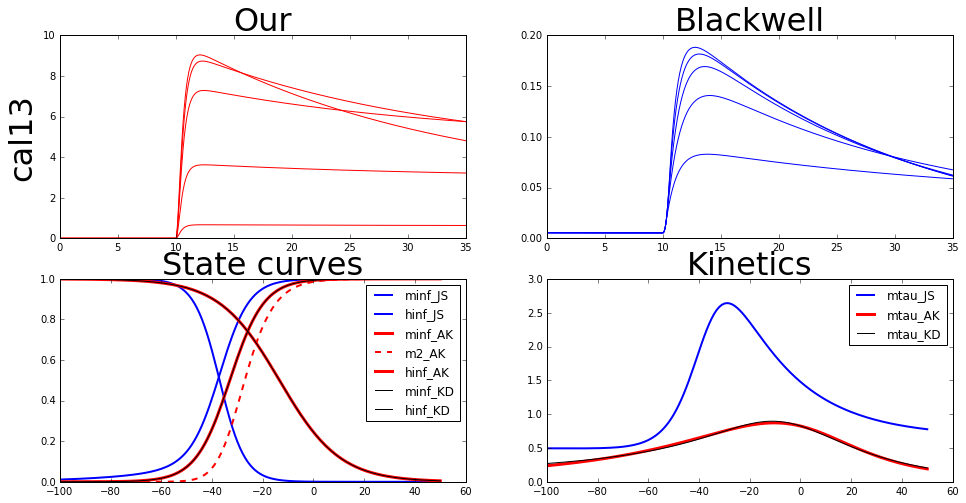

In [3]:

# {1500.0}/{1.0 + {exp { {-.005 + {x} }/{-.025}}}}
m_alpha    = 1.5/(1.0 + ( np.exp( (-5 + vm )/-25.0 ) )) 

# {2000.0}/{1.0 + {exp { {.052 + {x} }/{.007}}}}
m_beta     = 2.0/(1.0 + ( np.exp( (52 + vm )/ 7.0  ) )) 

mtau_JS    = 1 / np.add(m_alpha, m_beta)
minf_JS    = np.multiply(m_alpha,mtau_JS)

# hvHalfCaL13 = -37e-3
# hkCaL13     =  5e-3
# beta        = {{x} - {hvHalfCaL13}}/{hkCaL13}
# beta_exp    = {exp {beta}} + 1.0
# hInfCaL13   = 1.0/{beta_exp}
hinf_JS    = 1.0/ (1.0+np.exp( (vm-(-37))/5.0 ))

# our channel, implemented by Alexander Kozlov ---------------------------------
minf_AK    = 1.0/(1.0+np.exp((vm-(-33))/(-6.7)))
mtau_AK    = 0.06+1.0/(np.exp((vm-10)/20.0)+np.exp((vm-(-17))/-48.0))
hinf_AK    = 1.0/(1.0+np.exp((vm-(-13.4))/11.9))

# Du et al., 2017 ---------------------------------------------------------------
# theta       = 0.0398e6*{ {x} + 8.124e-3}
# beta        = {{x} + 8.124e-3}/9.005e-3
# beta_exp    = {exp {beta}}
# beta_exp    = beta_exp - 1.0
# mA          = {{theta}/{beta_exp}}
theta       = 0.0398e6*( vm2 + 8.124e-3)
beta        = (vm2 + 8.124e-3)/9.005e-3
beta_exp    = np.exp(beta)
beta_exp    = beta_exp - 1.0
mA          = theta/beta_exp

# beta        = {{x}/31.4e-3}
# beta_exp    = {exp {beta}} 
# mB          = 0.99e3*{beta_exp}
beta        = vm2/31.4e-3
beta_exp    = np.exp(beta) 
mB          = 0.99e3*beta_exp

# mTauCaL13   = {1.0/{mA + mB}}
mtau_KD    = 1.0 / np.add(mA, mB)

# mvHalfCaL13 = -33.0e-3
# mkCaL13     = -6.7e-3
# beta        = {{x} - {mvHalfCaL13}}/{mkCaL13}
# beta_exp    = {exp {beta}} + 1.0
# mInfCaL13   = 1.0/{beta_exp}
minf_KD    = 1.0 / (1.0 + np.exp((vm+33)/-6.7))

# hvHalfCaL13 = -13.4e-3
# hkCaL13     =  11.9e-3
# beta        = {{x} - {hvHalfCaL13}}/{hkCaL13}
# beta_exp    = {exp {beta}} + 1.0
# hInfCaL13   = 1.0/{beta_exp}
hinf_KD       = 1.0 / (1.0 + np.exp((vm+13.4)/11.9))


# plotting ------------------------------------------------------------------
fig, ax    = plt.subplots(2,2, figsize=(16,8))

ax[1,0].plot(vm, minf_JS, 'b', lw=2, label='minf_JS')
ax[1,0].plot(vm, hinf_JS, 'b', lw=2, label='hinf_JS')
ax[1,0].plot(vm, minf_AK, 'r', lw=3, label='minf_AK')
ax[1,0].plot(vm, np.power(minf_AK,2), '--r', lw=2, label='m2_AK')
ax[1,0].plot(vm, hinf_AK, 'r', lw=3, label='hinf_AK')
ax[1,0].plot(vm, minf_KD, 'k', lw=1, label='minf_KD')
ax[1,0].plot(vm, hinf_KD, 'k', lw=1, label='hinf_KD')
ax[1,0].legend(loc='best')
ax[1,0].set_title('State curves', fontsize=32)

ax[1,1].plot(vm, mtau_JS, 'b', lw=2, label='mtau_JS')
ax[1,1].plot(vm, mtau_AK, 'r', lw=3, label='mtau_AK')
ax[1,1].plot(vm2*1e3, mtau_KD*1e3, 'k', lw=1, label='mtau_KD')
ax[1,1].legend(loc='best')
ax[1,1].set_title('Kinetics', fontsize=32)

markers     = ['cal13', 'CaL13_channel'] 

plot_vclamp(markers, ax=ax[0,:])
plt.show()

In [4]:
data = [['m2', '-33', '-6.7', '-13.4', '11.9', '2', '44.3', 'htau constant in all three versions'],
        ['m',  '-', '-', '-37', '5.0',  '2', '44.3', 'q=3 in one "global" file'],
        ['m2', '-33', '-6.7', '-13.4', '11.9', '2', '14.77','htau_KD = htau_JS / 3; no q applied']]

df = pd.DataFrame(data, columns=['m form', 'm half', 'm slope', 'h half', 'h slope', 'q', 'htau', 'comment']).fillna("")
df.index = ['In use', 'JS', 'KD']
df

m form m half m slope h half h slope  q   htau  \
In use     m2    -33    -6.7  -13.4    11.9  2   44.3   
JS          m      -       -    -37     5.0  2   44.3   
KD         m2    -33    -6.7  -13.4    11.9  2  14.77   

                                    comment  
In use  htau constant in all three versions  
JS                 q=3 in one "global" file  
KD      htau_KD = htau_JS / 3; no q applied

## cav2.3 (R-type)

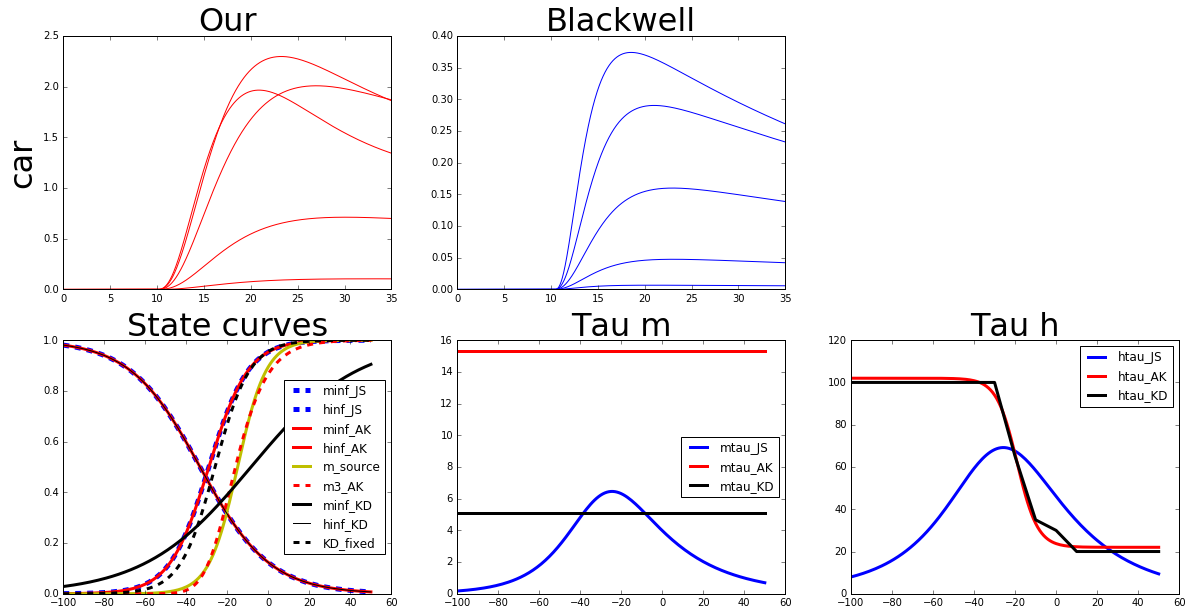

In [5]:

# {240./{exp {{x}/-.028}}}
m_alpha    = 240.0 / np.exp( vm2/-0.028 ) 

# {{1.26e6 + 8.0e6 * {x} }/{-1.0 + { exp {{ {x} + 0.158}/.0136}}}}
m_beta     = (1.2e6 + 8.0e6*vm2) / (np.exp((vm2+0.158)/0.0136) - 1.0)

mtau_JS    = 1 / np.add(m_alpha, m_beta)

# mvHalfCaR   = -29e-3  
# mkCaR       = -9.6e-3
# theta       = {{x} - {mvHalfCaR}}/{mkCaR}
# theta_exp   = {exp {theta}} + 1.0
# mInfCaR     = 1.0/{theta_exp}
minf_JS    = 1.0 / (1.0 + np.exp( (vm+29)/-9.6 ))

# hvHalfCaR   = -33.3e-3
# hkCaR       = 17e-3
# hTauAlpha   = {{10000.*.11+10000.*{x}}/{-1+{exp {{{x}+.110001}/.017}}}}
# hTauBeta    = {20/{exp {{x}/-.03}}}
# hTauCaR     = {1.0/{{hTauAlpha}+{hTauBeta}}}
hTauAlpha  = (10000.*.11+10000.*vm2) / ( np.exp( (vm2+.110001)/.017 ) -1 )
hTauBeta   = 20.0 / np.exp( vm2/-.03 )
htau_JS    = 1.0  / np.add(hTauAlpha, hTauBeta)

# hvHalfCaR   = -33.3e-3
# hkCaR       = 17e-3
# theta       = {{x} - {hvHalfCaR}}/{hkCaR}
# theta_exp   = {exp {theta}} + 1.0
# hInfCaR     = 1.0/{theta_exp}
hinf_JS    = 1.0/ (1.0+np.exp( (vm-(-33.3))/17.0 ))

# our channel, implemented by Alexander Kozlov ----------------------------------------
minf_AK    = 1.0 / (1.0+np.exp((vm-(-29))/-9.6))
mtau_AK    = [5.1*3] * len(vm) 
hinf_AK    = 1.0 / (1.0+np.exp((vm-(-33.3))/17.0))
htau_AK    = 22 + 80.0/( 1.0 + np.exp((vm-(-19))/5.0))

# Du et al., 2017 ---------------------------------------------------------------------
# setfield CaR_taum table->table[0] 1.7  \
#                   table->table[1] 1.7
mtau_KD    = [5.1] * len(vm) 

# mvhalf     = -8.46
# mslope     = 25.98
# mshift     =  0.0
# minf  = 1/(1 + {exp {-(x - mvhalf + mshift)/mslope}})
KD_fixed   = 1.0 / ( 1.0 + np.exp( -( vm +25.98  )/8.46  )   )
minf_KD    = 1.0 / ( 1.0 + np.exp( -( vm-(-8.46) )/25.98 )   )

# CaR_tauh        table->table[0] 100   \
#                 table->table[1] 100    \
#                 table->table[2] 100    \
#                 table->table[3] 100    \
#                 table->table[4] 100    \
#                 table->table[5] 100   \
#                 table->table[6] 100   \
#                 table->table[7] 100  \
#                 table->table[8] 65 \
#                 table->table[9] 35\
#                 table->table[10] 30 \
#                 table->table[11] 20 \
#                 table->table[12] 20 \
#                 table->table[13] 20  \
#                 table->table[14] 20  \
#                 table->table[15] 20 
vm3 = np.arange(-100,51,10)
htau_KD       = [100]*8 + [65] + [35] + [30] + [20]*5

# hvhalf     = -33.3
# hslope     =  17
# hshift     =  0.0
# hinf  = 1/(1 + {exp {(x - hvhalf + hshift)/hslope}})
hinf_KD    = 1.0 / (1.0 + np.exp((vm+33.3)/17.0))

# activation from Foehring, Surmeier et al 2000 -----------------------------------------
minf_FS    = 1.0 / (1.0+np.exp((vm-(-15))/-7.0))

# plotting -------------------------------------------------------------------------------
fig, ax    = plt.subplots(2,3, figsize=(20,10))

ax[1,0].plot(vm, minf_JS, '--b', lw=5, label='minf_JS')
ax[1,0].plot(vm, hinf_JS, '--b', lw=5, label='hinf_JS')
ax[1,0].plot(vm, minf_AK, 'r', lw=3, label='minf_AK')
ax[1,0].plot(vm, hinf_AK, 'r', lw=3, label='hinf_AK')
ax[1,0].plot(vm, minf_FS, 'y', lw=3, label='m_source')
ax[1,0].plot(vm, minf_AK**3, '--r', lw=3, label='m3_AK')
ax[1,0].plot(vm, minf_KD, 'k', lw=3, label='minf_KD')
ax[1,0].plot(vm, hinf_KD, 'k', lw=1, label='hinf_KD')
ax[1,0].plot(vm, KD_fixed, '--k', lw=3, label='KD_fixed')
ax[1,0].legend(loc='best')
ax[1,0].set_title('State curves', fontsize=32)

ax[1,1].plot(vm2*1e3, mtau_JS*1e3, 'b', lw=3, label='mtau_JS')
ax[1,1].plot(vm, mtau_AK, 'r', lw=3, label='mtau_AK')
ax[1,1].plot(vm, mtau_KD, 'k', lw=3, label='mtau_KD')
ax[1,1].legend(loc='best')
ax[1,1].set_title('Tau m', fontsize=32)

ax[1,2].plot(vm2*1e3, htau_JS*1e3, 'b', lw=3, label='htau_JS')
ax[1,2].plot(vm,  htau_AK, 'r', lw=3, label='htau_AK')
ax[1,2].plot(vm3, htau_KD, 'k', lw=3, label='htau_KD')
ax[1,2].legend(loc='best')
ax[1,2].set_title('Tau h', fontsize=32)

markers = ['car',   'CaR_channel'] 

plot_vclamp(markers, ax=ax[0,:])
ax[0,2].axis('off')
plt.show()

In [6]:
data = [['m3', '-29', '-9.6', '-33.3', '-17.0', 'h', '3', 'mtau_AK = 5.1*3/q = mtau_KD*3*3/q = mtau_KD*3. '],
        ['m3', '-29', '-9.6', '-33.3', '-17.0', 'h', '2?', 'q=3 in one "global" file'],
        ['m3', '-8.46', '-25.98', '-33.3', '-17.0', 'h', '3', '']]

df = pd.DataFrame(data, columns=['m form', 'm half', 'm slope', 'h half', 'h slope', 'h form', 'q', 'comment']).fillna("")
df.index = ['In use', 'JS', 'KD']
df

m form m half m slope h half h slope h form   q  \
In use     m3    -29    -9.6  -33.3   -17.0      h   3   
JS         m3    -29    -9.6  -33.3   -17.0      h  2?   
KD         m3  -8.46  -25.98  -33.3   -17.0      h   3   

                                                comment  
In use  mtau_AK = 5.1*3/q = mtau_KD*3*3/q = mtau_KD*3.   
JS                             q=3 in one "global" file  
KD

### Comment on differences 
** Apart from a mix up of slope factor and half activation in Du et al., 2017, the state curves are close both over model version and with the curve in the source (after m3 fit, Foehring et al., 2000). The time constants is however not the same (see figures above).**

## T-type (cav3.1-3)
The source used for this channel reports both room temperature and physiological conditons (Iftinca et al., 2006). 
Our different model versions differs in the data used. Jedrzejewska-Szmek et al., (2017) uses another source (McRory et al., 2001). 

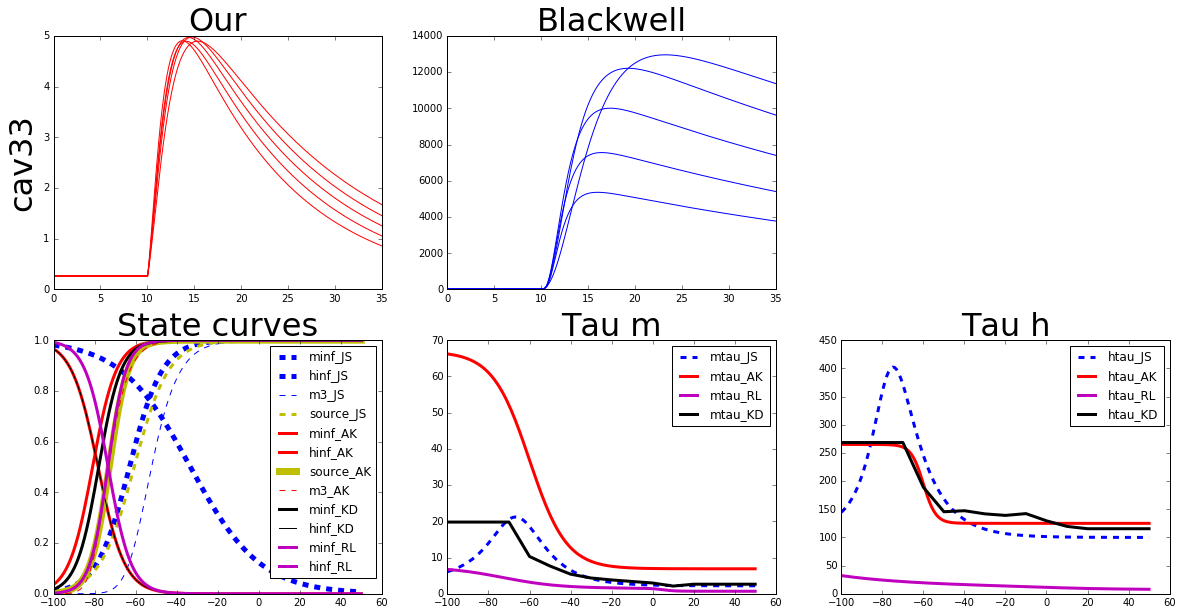

In [7]:
# theta    = 14552*{ {x} + 0.0845}
# beta     = {{x}  + 0.0845}/0.00712
# beta_exp = {exp {beta}}
# beta_exp = beta_exp - 1.0
# mA       = {{theta}/{beta_exp}}
# beta     = {{x}/0.013}
# beta_exp = {exp {beta}} 
# mB       = 4984.2*{beta_exp}
# mTauCaT  = {{1.0/{mA + mB}}+0.0022}
theta    = 14552*( vm2 + 0.0845)
beta     = (vm2 + 0.0845) / 0.00712
beta_exp = np.exp(beta) - 1.0
mA       = theta / beta_exp
mB       = 4984.2*np.exp(vm2/0.013)
mtau_JS  = 1.0 / np.add(mA, mB) + 0.0022

# mvHalfCaT = -72e-3 
# mkCaT     = -8e-3
# mshift    = 0.009
# theta     = {{{x} - {mshift} - {mvHalfCaT}}/{mkCaT}}
# theta_exp = {exp {theta}} + 1.0
# mInfCaT   = 1.0/{theta_exp}
minf_JS  = 1.0 / ( 1.0+np.exp( (vm - 9 - (-72)) / -8.0 ) )

# theta     = 2652*{ {x} + 0.0945}
# beta      = {{x}  + 0.0945}/0.00512
# beta_exp  = {exp {beta}}
# beta_exp  = beta_exp - 1.0
# hA        = {{theta}/{beta_exp}}
# beta      = {{x}/0.013}
# beta_exp  = {exp {beta}} 
# hB        = 684.2*{beta_exp}
# hTauCaT   = {{1.0/{hA + hB}}+0.1}                 
theta    = 2652*(vm2 + 0.0945)
beta     = (vm2 + 0.0945)/0.00512
beta_exp = np.exp(beta) - 1.0
hA       = theta / beta_exp
hB       = 684.2 * np.exp( vm2/0.013 ) 
htau_JS  = 1.0 / np.add(hA, hB) + 0.1

# hvHalfCaT = -93e-3
# hkCaT     = 5e-3
# hshift    = 0.007
# theta     = {{{x} - {hshift} - {hvHalfCaT}}/{hkCaT}}
# theta_exp = {exp {theta}} + 1.0
# hInfCaT   = 1.0/{theta_exp}
hInf_JS  = 1.0 / ( 1.0 + np.exp( (vm - 7 - (-93)) / 5.0 ) )

# Alex channel, implemented by Alexander Kozlov ----------------------------------------
minf_AK  = 1.0/(1.0+np.exp((vm-(-81))/(-5.8)))
mtau_AK  = (2.3+20.0/(1.0+np.exp((vm-(-60))/9.0)))*3.0
hinf_AK  = 1.0 / (1.+np.exp((vm-(-78.3))/6.5))
htau_AK  = 125+140.0/(1.0+np.exp((vm-(-60))/3.0))

# My channel; implemented by me Robert Lindroos ---------------------------------------
mvhalf   = -73.5 
mslope   =  -4.4 
hvhalf   = -73.4 
hslope   =   5.6
minf_RL  = 1.0/(1+np.exp((vm-mvhalf)/mslope))
hinf_RL  = 1.0/(1.0+np.exp((vm-hvhalf)/hslope))
mtau_RL  = 6.0/(1+np.exp((vm+73.0)/14.0)) + 0.8/(1+np.exp( (vm-5.0)/3.0)) + 0.7 
htau     = 5.5/(1 + np.exp(0.06*(vm))) + 7
htau2    = 90*np.exp(-(vm+68.0)/40.0) + 10
htau_RL  = 0.9*htau + 0.1*htau2

# Du et al., 2017 ---------------------------------------------------------------------
# setfield CaV33_taum table->table[0] 19.8   \
#                     table->table[1] 19.8    \
#                     table->table[2] 19.8    \
#                     table->table[3] 19.8    \
#                     table->table[4] 10.3    \
#                     table->table[5] 7.66   \
#                     table->table[6] 5.42   \
#                     table->table[7] 4.36  \
#                     table->table[8] 3.83  \
#                     table->table[9] 3.4  \
#                     table->table[10] 2.98  \
#                     table->table[11] 2.13  \
#                     table->table[12] 2.65  \
#                     table->table[13] 2.65  \
#                     table->table[14] 2.65  \
#                     table->table[15] 2.65                  
mtau_KD = [19.8]*4 + [10.3, 7.66, 5.42, 4.36, 3.83, 3.4, 2.98, 2.13] + [2.65]*4

# setfield CaV33_tauh table->table[0] 268.4   \
#                     table->table[1]  268.4    \
#                     table->table[2] 268.4    \
#                     table->table[3] 268.4   \
#                     table->table[4] 188.9    \
#                     table->table[5] 145.6   \
#                     table->table[6] 147.4   \
#                     table->table[7] 141.8  \
#                     table->table[8] 139.1  \
#                     table->table[9] 142.27  \
#                     table->table[10] 129.48  \
#                     table->table[11] 119.57  \
#                     table->table[12] 115.46  \
#                     table->table[13] 115.46  \
#                     table->table[14] 115.46  \
#                     table->table[15] 115.46 
htau_KD = [268.4]*4 + [188.9, 145.6, 147.4, 141.8, 139.1, 142.27, 129.48, 119.57] + [115.46]*4

mvhalf     = -78.01 
mslope     =  5.472  
hvhalf     =  -78.3
hslope     =  6.5  
minf_KD    = 1.0/(1 + np.exp(-(vm - mvhalf)/mslope))
hinf_KD    = 1.0/(1 + np.exp( (vm - hvhalf)/hslope))

# experimental data  ---------------------------------------------------------------------
# Iftinca et al., (2006). Temperature dependence of T-type calcium channel gating
minf_IF    = 1.0 / (1.0+np.exp((vm-(-72.9))/-4.6))
minf_Mc    = 1.0 / (1.0+np.exp((vm-(-60.7))/-8.39))

# plotting -------------------------------------------------------------------------------
fig, ax    = plt.subplots(2,3, figsize=(20,10))

ax[1,0].plot(vm, minf_JS, '--b', lw=5, label='minf_JS')
ax[1,0].plot(vm, hinf_JS, '--b', lw=5, label='hinf_JS')
ax[1,0].plot(vm, minf_JS**3, '--b', lw=1, label='m3_JS')
ax[1,0].plot(vm, minf_Mc, '--y', lw=3, label='source_JS')
ax[1,0].plot(vm, minf_AK, 'r', lw=3, label='minf_AK')
ax[1,0].plot(vm, hinf_AK, 'r', lw=3, label='hinf_AK')
ax[1,0].plot(vm, minf_IF, 'y', lw=7, label='source_AK')
ax[1,0].plot(vm, minf_AK**3, '--r', lw=1, label='m3_AK')
ax[1,0].plot(vm, minf_KD, 'k', lw=3, label='minf_KD')
ax[1,0].plot(vm, hinf_KD, 'k', lw=1, label='hinf_KD')
ax[1,0].plot(vm, minf_RL, 'm', lw=3, label='minf_RL')
ax[1,0].plot(vm, hinf_RL, 'm', lw=3, label='hinf_RL')
ax[1,0].legend(loc='best')
ax[1,0].set_title('State curves', fontsize=32)

ax[1,1].plot(vm2*1e3, mtau_JS*1e3, '--b', lw=3, label='mtau_JS')
ax[1,1].plot(vm, mtau_AK,  'r', lw=3, label='mtau_AK')
ax[1,1].plot(vm, mtau_RL,  'm', lw=3, label='mtau_RL')
ax[1,1].plot(vm3, mtau_KD, 'k', lw=3, label='mtau_KD')
ax[1,1].legend(loc='best')
ax[1,1].set_title('Tau m', fontsize=32)

ax[1,2].plot(vm2*1e3, htau_JS*1e3, '--b', lw=3, label='htau_JS')
ax[1,2].plot(vm,  htau_AK, 'r', lw=3, label='htau_AK')
ax[1,2].plot(vm,  htau_RL, 'm', lw=3, label='htau_RL')
ax[1,2].plot(vm3, htau_KD, 'k', lw=3, label='htau_KD')
ax[1,2].legend(loc='best')
ax[1,2].set_title('Tau h', fontsize=32)

markers = ['cav33', 'CaT_channel', 'cav32'] 

plot_vclamp(markers, ax=ax[0,:])
ax[0,2].axis('off')
plt.show()


# markers = [ ['can',   'CaN_channel'  ], \
#             ['car',   'CaR_channel'  ], \
#             ['cav33', 'CaT_channel', 'cav32'  ], \
#             ['cal12', 'CaL12_channel'], \
#             ['cal13', 'CaL13_channel']  ] 

In [8]:
data = [['m2', '-73.5', '-4.4', '-73.4', '5.6', 'h', '-', 'physiological temperature = no q '],
        ['m3', '-81', '-5.8', '-78.3', '6.5', 'h', '3', 'again, mtau multiplied by 3'],
        ['m3', '-72+9', '-8.0', '-93+7', '5.0', 'h', '2?', 'Gates shifted, if not m3 good fit'],
        ['m2', '-78.01', '-5.472', '-78.3', '6.5', 'h', '3', '']]

df = pd.DataFrame(data, columns=['m form', 'm half', 'm slope', 'h half', 'h slope', 'h form', 'q', 'comment']).fillna("")
df.index = ['In use', 'AK', 'JS', 'KD']
df

m form  m half m slope h half h slope h form   q  \
In use     m2   -73.5    -4.4  -73.4     5.6      h   -   
AK         m3     -81    -5.8  -78.3     6.5      h   3   
JS         m3   -72+9    -8.0  -93+7     5.0      h  2?   
KD         m2  -78.01  -5.472  -78.3     6.5      h   3   

                                  comment  
In use  physiological temperature = no q   
AK            again, mtau multiplied by 3  
JS      Gates shifted, if not m3 good fit  
KD

<img src="Figures/IV_comp2exp.png">

## cav2.2 and cav1.2
The V-clamp of these two channels are similar. No detailed comparison done so far...

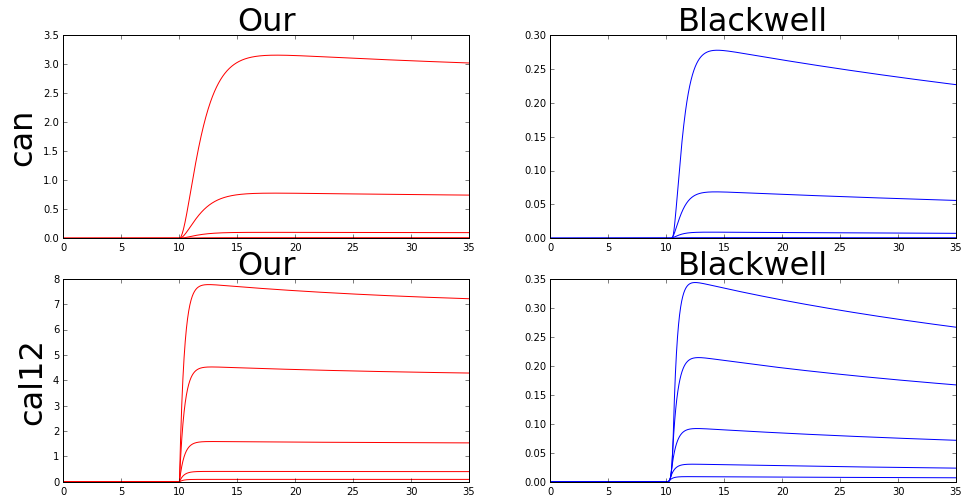

In [9]:
fig, ax    = plt.subplots(2,2, figsize=(16,8))

markers    = ['can',   'CaN_channel'  ] 
plot_vclamp(markers, ax=ax[0,:])

markers    = ['cal12', 'CaL12_channel'] 
plot_vclamp(markers, ax=ax[1,:])

plt.show()

## How about comparing currents?
In the vclamp simulations above the permability (output before GHK filtering) was measured. How about comparing the current? The GHK object itself should be the same so what should differ is the internal model for Ca dynamic.

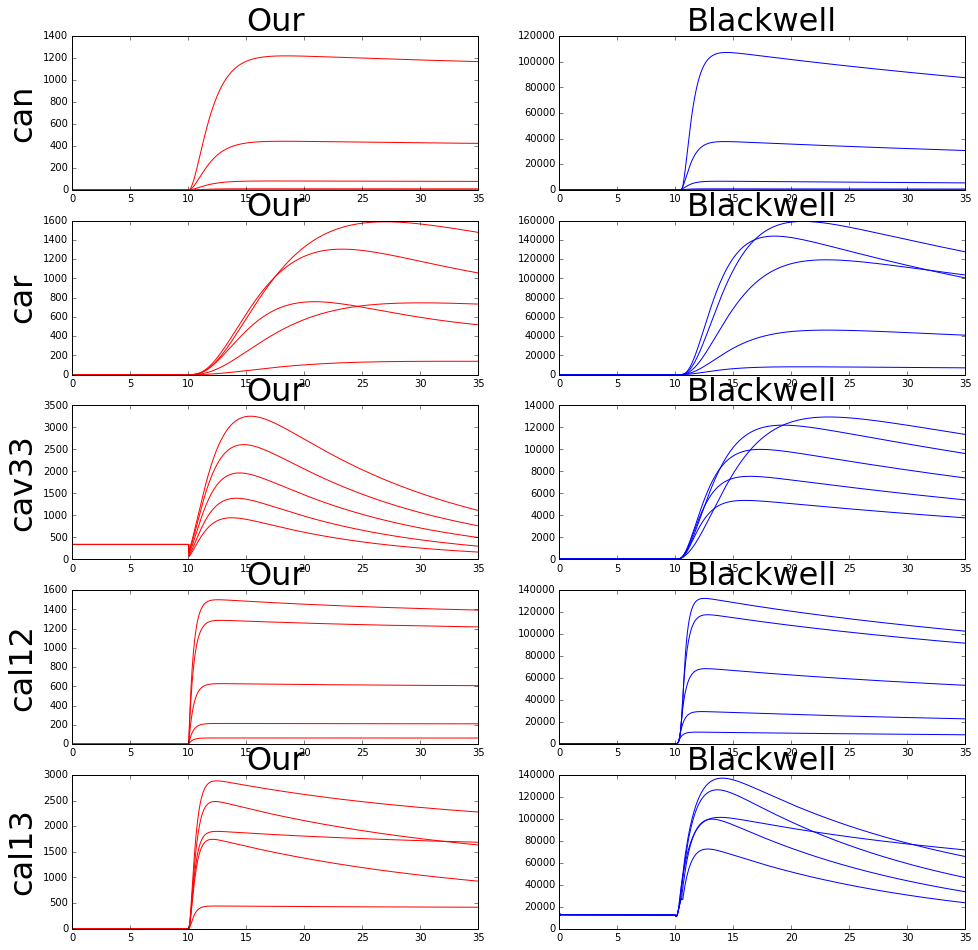

In [10]:
markers = [ ['can',   'CaN_channel'  ], \
            ['car',   'CaR_channel'  ], \
            ['cav33', 'CaT_channel', 'cav32'  ], \
            ['cal12', 'CaL12_channel'], \
            ['cal13', 'CaL13_channel']  ] 

fig, ax = plt.subplots(len(markers), 2, figsize=(16,16))

for m, marker in enumerate(markers):
    plot_vclamp(marker, ax=ax[m,:], what='I_')

plt.show()

### Comment
The kinetics of the current is not very different from the condctance and is similar for channels with similar conductance. This might be a concequence of low maximal conductances used--not changing the internal Ca concentration much and thereby giving a close to constant value.

# Comparing old and new naf channel

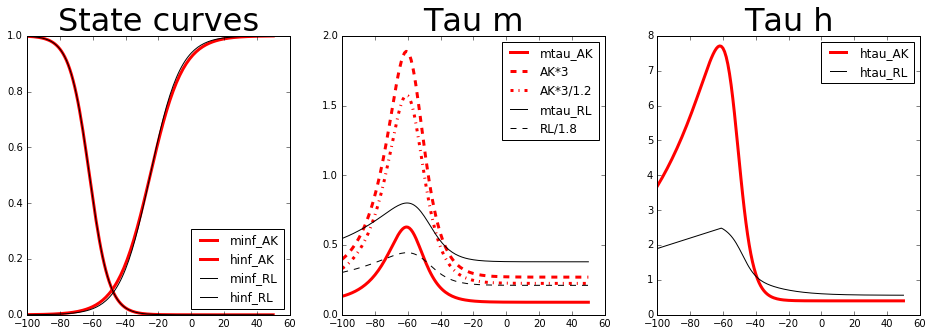

In [14]:
# our channel, implemented by Alexander Kozlov ---------------------------------
minf_AK    = 1.0/(1.0+np.exp((vm-(-25))/(-10.0)))
mtau_AK    = 0.09+1.0/(np.exp((vm-(-58))/8.0)+np.exp((vm-(-59))/(-13.0)))
hinf_AK    = 1.0/(1.0+np.exp((vm-(-62))/6.0))
htau_AK    = 0.4+1.0/(np.exp((vm-(-41))/4.9)+np.exp((vm-(-150))/(-42.0)))

# mine -------------------------------------------------------------------------
minf_RL    = 1.0/(1.0+np.exp((vm-(-25.0))/(-9.2)))
mtau_RL    = 0.38 + 1/( 0.6*np.exp((vm-(-58.0))/8.0) + 1.8*np.exp((vm-(-58.0))/(-35.0))  )
hinf_RL    = 1.0/(1.0+np.exp((vm-(-62))/6.0))
htau_RL    = []
for i in vm:
    if i < -60:
        htau_RL.append(3.4 + 0.015*i)
    else:
        htau_RL.append(0.56 + 1.1/(1+np.exp((i-(-48))/15.0)) + 1.2/(1+np.exp((i-(-48))/4.0)))

fig,ax = plt.subplots(1,3, figsize=(16,5))

ax[0].plot(vm, minf_AK, 'r', lw=3, label='minf_AK')
ax[0].plot(vm, hinf_AK, 'r', lw=3, label='hinf_AK')
ax[0].plot(vm, minf_RL, 'k', lw=1, label='minf_RL')
ax[0].plot(vm, hinf_RL, 'k', lw=1, label='hinf_RL')
ax[0].legend(loc='best')
ax[0].set_title('State curves', fontsize=32)

ax[1].plot(vm, mtau_AK, 'r', lw=3, label='mtau_AK')
ax[1].plot(vm, mtau_AK*3.0, '--r', lw=3, label='AK*3')
ax[1].plot(vm, mtau_AK*3.0/1.2, '-.r', lw=3, label='AK*3/1.2')
ax[1].plot(vm, mtau_RL, 'k', lw=1, label='mtau_RL')
ax[1].plot(vm, mtau_RL/1.8, '--k', lw=1, label='RL/1.8')
ax[1].legend(loc='best')
ax[1].set_title('Tau m', fontsize=32)

ax[2].plot(vm, htau_AK, 'r', lw=3, label='htau_AK')
ax[2].plot(vm, htau_RL, 'k', lw=1, label='htau_RL')
ax[2].legend(loc='best')
ax[2].set_title('Tau h', fontsize=32)
plt.savefig('naf_channel_states_and_kinetics.pdf', bbox_inches='tight')
#plt.show()